# Bayesian Network
## Dog Alarm System example
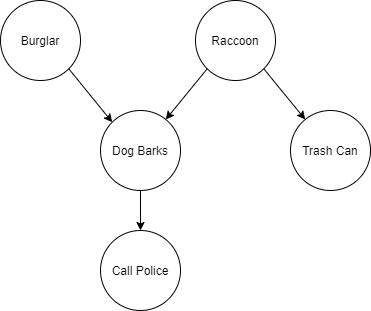

We are going to evaluate the following joint probability
P(B,R,D,T,C) = P(P|D) . P(D|B,R) . P(T|R) . P(R) . P(B)

B = Burglar;
R = Raccoon;
T = Trash Can;
D = Dog Barks;
C = Call Pollice;

In [43]:
pip install pyAgrum

In [44]:
import os
from pylab import *
import matplotlib.pyplot as plt
import pyAgrum as gum

In [ ]:
path = os.path.join(os.getcwd() + "/dog_alarm_samples/")
os.mkdir(path)

Create an empty BN network

In [47]:
bn = gum.BayesNet('DogAlarmSystem')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


PyAgrum provides 3 types of variables: LabelizedVariable, RangeVariable and DiscretizedVariable. We are going to use LabelizedVariable and create them on the next line.

In [48]:
c,d,b,r,t = [bn.add(name, 2) for name in "cdbrt"]
print(c,d,b,r,t)
print(bn)

0 1 2 3 4
BN{nodes: 5, arcs: 0, domainSize: 32, dim: 10}


We will connect nodes using .addArc(). We are connecting accordingly to the diagram displayed before.

In [49]:
for link in [(b,d),(r,d),(r,t),(d,c)]:
  bn.addArc(*link)

In [50]:
import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x2dec600) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 20}

Next we will create the conditional probability tables (CPT) distributions. We are assuming that we know these values from collected data.

In [51]:
bn.cpt("b").fillWith([0.9,0.1])

(gum::Potential<double>@0x3839e00) <b:0> :: 0.9 /<b:1> :: 0.1

In [52]:
bn.cpt("r").fillWith([0.5,0.5])

(gum::Potential<double>@0x3839f40) <r:0> :: 0.5 /<r:1> :: 0.5

In [53]:
bn.cpt("t")[{'r':0}]=[0.99,0.01]
bn.cpt("t")[{'r':1}]=[0.2,0.8]
bn.cpt("t")

(gum::Potential<double>@0x3839cc0) <t:0|r:0> :: 0.99 /<t:1|r:0> :: 0.01 /<t:0|r:1> :: 0.2 /<t:1|r:1> :: 0.8

In [54]:
bn.cpt("d")[{'b': 0, 'r': 0}] = [0.99, 0.01]
bn.cpt("d")[{'b': 0, 'r': 1}] = [0.4, 0.6]
bn.cpt("d")[{'b': 1, 'r': 0}] = [0.2, 0.8]
bn.cpt("d")[{'b': 1, 'r': 1}] = [0.1, 0.9]
bn.cpt("d")

(gum::Potential<double>@0x38398e0) <d:0|b:0|r:0> :: 0.99 /<d:1|b:0|r:0> :: 0.01 /<d:0|b:1|r:0> :: 0.2 /<d:1|b:1|r:0> :: 0.8 /<d:0|b:0|r:1> :: 0.4 /<d:1|b:0|r:1> :: 0.6 /<d:0|b:1|r:1> :: 0.1 /<d:1|b:1|r:1> :: 0.9

In [55]:
bn.cpt("c")[{'d':0}]=[0.99,0.01]
bn.cpt("c")[{'d':1}]=[0.2,0.8]
bn.cpt("c")

(gum::Potential<double>@0x3839960) <c:0|d:0> :: 0.99 /<c:1|d:0> :: 0.01 /<c:0|d:1> :: 0.2 /<c:1|d:1> :: 0.8

##Inference in Bayesian Networks
There are two inference engines available in pyAgrum:


1.   LazyPropagation
2.   Gibbs



In [56]:
ie=gum.LazyPropagation(bn)

We can make an inference without evidence

In [57]:
ie.makeInference()
ie.posterior("c")

(gum::Potential<double>@0x4989800) <c:0> :: 0.705995 /<c:1> :: 0.294005

Or we can make inference with evidence. Let's assume that we know for a fact that there is a burglar around the house, which means that b = 1. This is a hard evidence.

In [58]:
ie.setEvidence({'b':1})
ie.makeInference()
ie.posterior("c")

(gum::Potential<double>@0x4988580) <c:0> :: 0.3185 /<c:1> :: 0.6815

Let's include a soft evidence and assume that if there isn't a raccoon, we have about 50% of knowing it, but if there is one, we know it's there.

In [59]:
ie.setEvidence({'r':[0.5, 1], 'b':1})
ie.makeInference()
ie.posterior("c")

(gum::Potential<double>@0x49884e0) <c:0> :: 0.305333 /<c:1> :: 0.694667

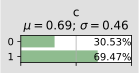

In [60]:
gnb.showProba(ie.posterior("c"))

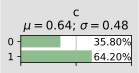

In [61]:
gnb.showPosterior(bn,{'b':1,'r':0},'c')

The next line creates a visual for our Bayesian Networks with no evidence

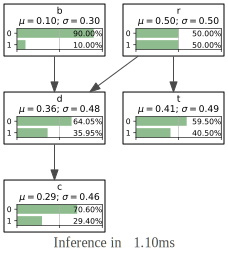

In [62]:
gnb.showInference(bn,evs={})

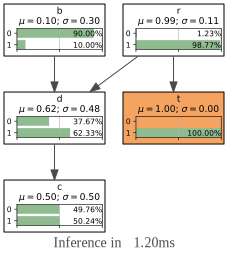

In [63]:
gnb.showInference(bn,evs={'t':1})

# Structural Learning
There are 3 learning algorithms that are wrapped in pyAgrum:


1.   LocalSearchWithTabuList
2.   Greedy Hill Climbing Algorithm
3.   K2

We are using Greedy Hill Climbing Algorithm in this process



In [64]:
import pyAgrum.lib._utils.oslike as oslike
from IPython.display import HTML

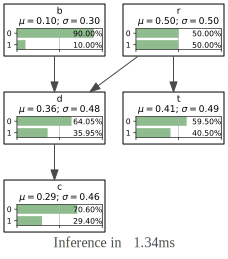

In [65]:
gnb.showInference(bn,evs={})

In [66]:
gum.generateCSV(bn,os.path.join(path,"samples_dog_alarm_system_first_gen.csv"),50000,True)

 /content/dog_alarm_samples/samples_dog_alarm_system_first_gen.csv : [ ####### ] 100%
Log2-Likelihood : -135072.32275531563


-135072.32275531563

In [67]:

print("===\n  Size of the generated database\n===")
oslike.wc_l('/content/dog_alarm_samples/samples_dog_alarm_system_first_gen.csv')
print("\n===\n  First lines\n===")
oslike.head('/content/dog_alarm_samples/samples_dog_alarm_system_first_gen.csv')

===
  Size of the generated database
===
50000

===
  First lines
===
t,c,r,b,d
0,0,0,0,0
0,0,0,0,0
0,1,0,1,1
1,0,1,0,0
0,0,0,0,0
1,1,1,0,1
0,0,0,0,0
1,0,1,0,1
0,0,0,0,0



We will learn from our sample to create a structure and define parameters

## Parameters learning from the database

### Use *bn* as template

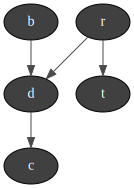

In [68]:
learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_first_gen.csv'), bn)
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [69]:
HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('b')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('b')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('c')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('c')))
     +'</center></td></tr></table>')

### Remove *bn* as template

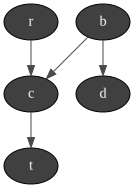

In [70]:
learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_first_gen.csv'))
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [71]:
HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('b')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('b')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('c')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('c')))
     +'</center></td></tr></table>')

We can make an inferece from the original structure to the random variable C and notice that they are very similar

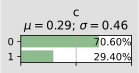

In [72]:
ie.setEvidence({})
gnb.showProba(ie.posterior("c"))

## Structural learning a Bayesian Network from the database
We will proceed with Greedy Hill Climbing Algorithm

In [73]:
learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_first_gen.csv'), bn)
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 5.261056ms


G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- d->b --> d->b <!-- r --> r r <!-- d->r --> d->r <!-- t --> t t <!-- d->t --> d->t <!-- r->b --> r->b <!-- t->r --> t->r


In [74]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- b->d --> b->d <!-- r --> r r <!-- r->d --> r->d <!-- t --> t t <!-- r->t --> r->t,G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- d->b --> d->b <!-- r --> r r <!-- d->r --> d->r <!-- t --> t t <!-- d->t --> d->t <!-- r->b --> r->b <!-- t->r --> t->r,G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- d->b --> d->b <!-- r --> r r <!-- d->r --> d->r <!-- t --> t t <!-- d->t --> d->t <!-- r->b --> r->b <!-- t->r --> t->r
target,learned BN,graphical diffs between target and learned


#Comparing Bayesian Networks

## Sampling next generations based on the best Bayesian Network

In [75]:
import pyAgrum.lib.bn_vs_bn as gcm

In [76]:
def dict2html(di1,di2=None): 
    res= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di1.items()])
    if di2 is not None:
        res+="<br/><br/>"
        res+= "<br/>".join([f"<b>{k:15}</b>:{v}" for k,v in di2.items()])
    return res

In [77]:
best_dist2opt = 1
best_bn = bn2
cmp_evolution = []
i = 0

In [78]:
while True:
  gum.generateCSV(best_bn,os.path.join(path,"samples_dog_alarm_system_next_gen.csv"),50000,True)
  learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_next_gen.csv'))
  learner.useGreedyHillClimbing()
  bn2=learner.learnBN()
  print("Learned in {0}ms".format(1000*learner.currentTime()))
  cmp=gcm.GraphicalBNComparator(bn,bn2)
  cmp_evolution.append(cmp)
  if cmp.scores()['dist2opt'] < best_dist2opt:
    best_dist2opt = cmp.scores()['dist2opt']
    best_bn = bn2
    best_cmp = cmp
    number_of_evolutions = i
  if cmp.scores()['dist2opt'] == 0.0:
    print("Stopped on generation {0}.".format(i))
    break
  i += 1
  

 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135109.46955875077
Learned in 6.79622ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135144.08388947858
Learned in 5.295826ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135960.6661546021
Learned in 9.380168ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135726.27281638718
Learned in 4.91729ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135851.40777620216
Learned in 6.484802ms
Stopped on generation 4.


In [79]:
  gnb.sideBySide(bn,best_bn,gnb.getBNDiff(bn,best_bn),dict2html(best_cmp.scores(),best_cmp.hamming()),best_cmp.equivalentBNs(),
                captions=['target','learned BN','graphical diffs between target and learned'])

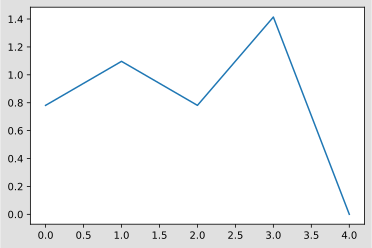

In [80]:
plt.plot([x.scores()['dist2opt'] for x in cmp_evolution]);

In [81]:
HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('b')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('b')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('c')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('c')))
     +'</center></td></tr></table>')

We were able to find the original BN structure and an acceptable CPT after a few interactions. It's important to mention that we knew before hand the population characteristics and used that information as a stop criteria. Nontheless, we demonstrated that is possible to achieve optimal solution if we stablish a ranking goal and sample new generations based on that.

## Not random sampling next generation
Next we will eliminate samples that *may not* contain valuable information. We'll apply the following criteria:


1.   Samples that all values are 0. We assume that they don't give valuable information
2.   I know that if a dog barks one may call the police.





In [82]:
import pandas as pd

In [83]:
learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_first_gen.csv'), bn)
learner.useGreedyHillClimbing()
learner.addMandatoryArc("d","c") # Dog barks -> Call the police
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 2.828656ms


G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- b->d --> b->d <!-- r --> r r <!-- r->d --> r->d <!-- t --> t t <!-- t->r --> t->r


In [84]:
best_dist2opt = 1
best_bn = bn2
cmp_evolution = []
i = 0
BAD_SAMPLE = [0]

In [85]:
while i < 30:
  gum.generateCSV(best_bn,os.path.join(path,"samples_dog_alarm_system_next_gen.csv"),50000,True)
  ##SAMPLE SELECTOR
  df = pd.read_csv(os.path.join(path,'samples_dog_alarm_system_next_gen.csv'))
  df["Rank"]=df.sum(axis=1)
  print(df.Rank.unique())
  df = df[~df.Rank.isin(BAD_SAMPLE)].drop(columns=["Rank"])
  df.to_csv(os.path.join(path,'samples_dog_alarm_system_next_gen.csv'), index=False)
  print(df.shape)
  learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_next_gen.csv'))
  learner.useGreedyHillClimbing()
  learner.addMandatoryArc("d","c") # Dog barks -> Call the police
  bn2=learner.learnBN()
  print("Learned in {0}ms".format(1000*learner.currentTime()))
  cmp=gcm.GraphicalBNComparator(bn,bn2)
  cmp_evolution.append(cmp)
  if cmp.scores()['dist2opt'] < best_dist2opt:
    best_dist2opt = cmp.scores()['dist2opt']
    best_bn = bn2
    best_cmp = cmp
    number_of_evolutions = i
  if cmp.scores()['dist2opt'] == 0.0:
    print("Stopped on generation {0}.".format(i))
    break
  i += 1
  


 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135259.6901796426
[3 0 4 2 1 5]
(28066, 5)
Learned in 2.447625ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -153417.29759337564
[3 2 4 1 5]
(50000, 5)
Learned in 3.635494ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -153167.24690642013
[4 3 1 2 5]
(50000, 5)
Learned in 14.931977ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -152614.31426449175
[1 4 3 2 5]
(50000, 5)
Learned in 4.381178ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -153197.9110840517
[3 1 4 2 5]
(50000, 5)
Learned in 4.164847ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -153168.97243760852
[3 2 4 1 5]
(50000, 5)
Learned

In [86]:
  gnb.sideBySide(bn,best_bn,gnb.getBNDiff(bn,best_bn),dict2html(best_cmp.scores(),best_cmp.hamming()),best_cmp.equivalentBNs(),
                captions=['target','learned BN','graphical diffs between target and learned'])

G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- b->d --> b->d <!-- r --> r r <!-- r->d --> r->d <!-- t --> t t <!-- r->t --> r->t,"count :{'tp': 4, 'tn': 10, 'fp': 6, 'fn': 0}recall :1.0precision :0.4fscore :0.5714285714285715dist2opt :0.6hamming :6structural hamming:9","c has different parents in the two bns whose names are in {'b', 'r', 't'}"
target,learned BN,graphical diffs between target and learned


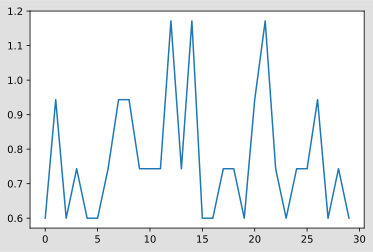

In [87]:
plt.plot([x.scores()['dist2opt'] for x in cmp_evolution]);

In [88]:
HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('b')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('b')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('c')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('c')))
     +'</center></td></tr></table>')

It seems that we have lost a lot of information discarding null events. Next we will only consider the following criteria:

1.   I know that if a dog barks one may call the police.




In [89]:
learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_first_gen.csv'), bn)
learner.useGreedyHillClimbing()
learner.addMandatoryArc("d","c") # Dog barks -> Call the police
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 2.731972ms


G <!-- c --> c c <!-- d --> d d <!-- d->c --> d->c <!-- b --> b b <!-- b->d --> b->d <!-- r --> r r <!-- r->d --> r->d <!-- t --> t t <!-- t->r --> t->r


In [90]:
best_dist2opt = 1
best_bn = bn2
cmp_evolution = []
i = 0

In [91]:
while True:
  gum.generateCSV(best_bn,os.path.join(path,"samples_dog_alarm_system_next_gen.csv"),50000,True)
  learner=gum.BNLearner(os.path.join(path,'samples_dog_alarm_system_next_gen.csv'))
  learner.useGreedyHillClimbing()
  learner.addMandatoryArc("d","c") # Dog barks -> Call the police
  bn2=learner.learnBN()
  print("Learned in {0}ms".format(1000*learner.currentTime()))
  cmp=gcm.GraphicalBNComparator(bn,bn2)
  cmp_evolution.append(cmp)
  if cmp.scores()['dist2opt'] < best_dist2opt:
    best_dist2opt = cmp.scores()['dist2opt']
    best_bn = bn2
    best_cmp = cmp
    number_of_evolutions = i
  if cmp.scores()['dist2opt'] == 0.0:
    print("Stopped on generation {0}.".format(i))
    break
  i += 1

 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -134883.64983220855
Learned in 13.535804ms
 /content/dog_alarm_samples/samples_dog_alarm_system_next_gen.csv : [ ######## ] 100%
Log2-Likelihood : -135040.19573343577
Learned in 3.396837ms
Stopped on generation 1.


In [92]:
  gnb.sideBySide(bn,best_bn,gnb.getBNDiff(bn,best_bn),dict2html(best_cmp.scores(),best_cmp.hamming()),best_cmp.equivalentBNs(),
                captions=['target','learned BN','graphical diffs between target and learned'])

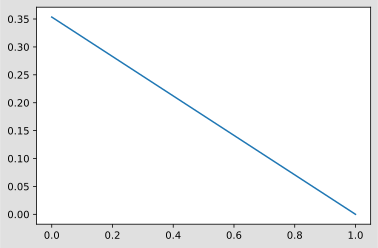

In [93]:
plt.plot([x.scores()['dist2opt'] for x in cmp_evolution]);

In [94]:
HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('b')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('b')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('c')))
     +'</center></td><td><center>'+
     gnb.getPotential(best_bn.cpt(best_bn.idFromName('c')))
     +'</center></td></tr></table>')